In [31]:
# neural network MLP 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# import data
train = pd.read_csv('data/kaggle_train.csv')
test = pd.read_csv('data/kaggle_test.csv')
# example = pd.read_csv('data/kaggle_example_submission.csv')

train = train[['f5','f10','f3','f8','f4','f9','f1','f6','id','target']]
test = test[['f5','f10','f3','f8','f4','f9','f1','f6','id']]

# split data
X = train.drop(['id', 'target'], axis=1)
y = train['target']

# scale data
scaler = StandardScaler()
X = scaler.fit_transform(X)
test = scaler.fit_transform(test.drop(['id'], axis=1))

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# train model
model = MLPRegressor(hidden_layer_sizes=(256, 256, 256), max_iter=5000)
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# score
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  1.9499542642297347


In [44]:
# predict test data
y_pred_submissions = model.predict(test)

# create submission file
submission = pd.DataFrame(test)
# add id columns starting at 401
submission['id'] = submission.index + 401
# add target column
submission['target'] = y_pred_submissions
submission = submission[['id', 'target']]
submission
submission.to_csv('data/mlp_sub_1.csv', index=False)

In [45]:
submission

,id,target
0,401,-36.798014
1,402,-10.259878
2,403,-1.781372
3,404,-4.197376
4,405,1.838709
...,...,...
795,1196,1.061638
796,1197,0.647141
797,1198,20.692557
798,1199,-2.709164


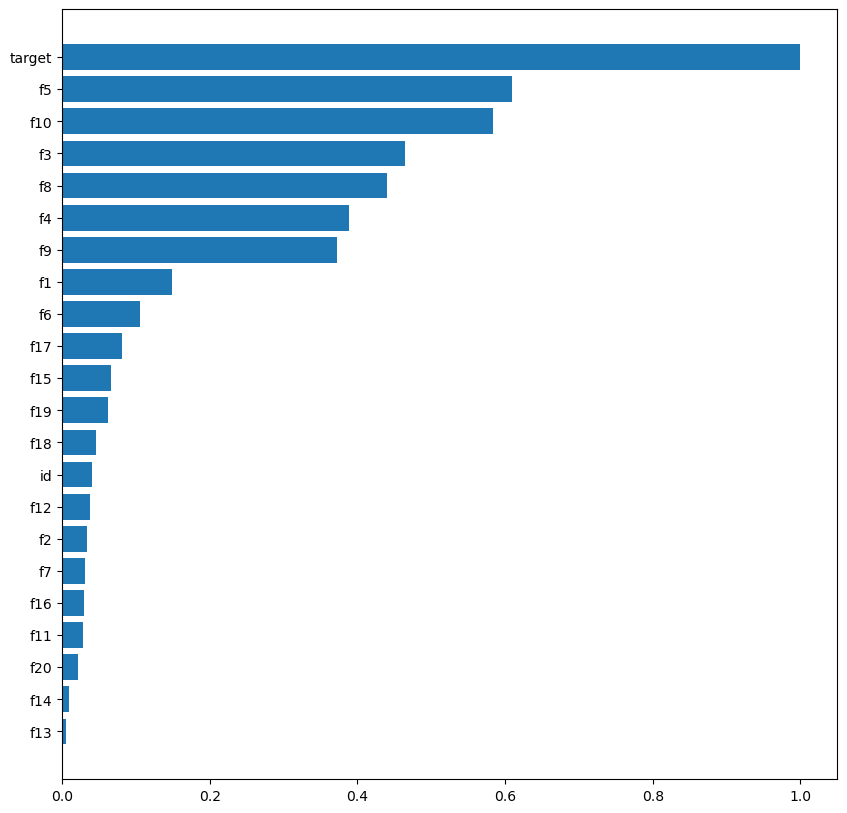

In [10]:
# show features that correlate most with target
corr_values_sorted = abs(train.corr()['target']).sort_values(ascending=False)
# plot correlation values
plt.figure(figsize=(10, 10))
plt.barh(corr_values_sorted.index, corr_values_sorted)
plt.gca().invert_yaxis()
plt.show()